In [6]:
import os
import numpy as np
import pandas as pd

for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/test.csv
./data/train.csv
./data/gender_submission.csv
./data/titanic.zip


In [7]:
df = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

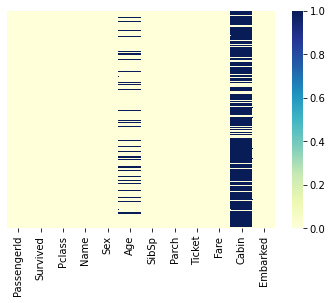

In [14]:
import seaborn as sns
sns.heatmap(df.isnull(), yticklabels=False, cmap="YlGnBu")

In [15]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

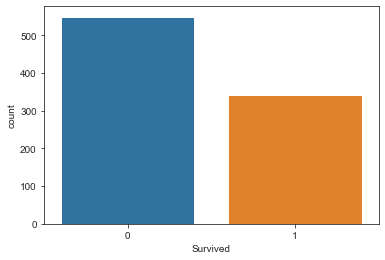

In [20]:
sns.set_style('ticks')
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

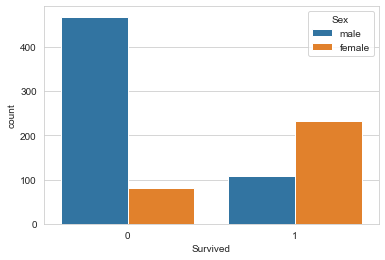

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

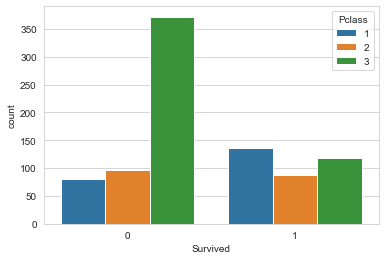

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue="Pclass", data=df)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

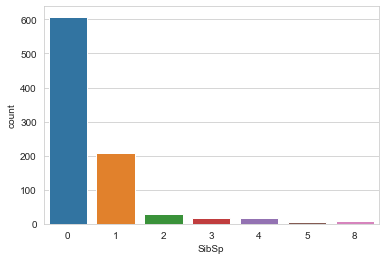

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp', data=df)

In [38]:
import pandas as pd
import plotly.express as px
temp = df.groupby(by="Cabin").count()
name = temp.Survived.index
val = temp.Survived.values

fig = px.scatter_polar(temp, r=val, theta=name, color=name, symbol=val, 
                      size=val, color_discrete_sequence=px.colors.sequential.Plasma_r, 
                       title='Survived by Cabin')
fig.show()

In [39]:
import plotly.express as px
t0 = df.iloc[(df["Survived"]==0).values]
t1 = df.iloc[(df["Survived"]==1).values]

temp0 = t0.groupby(by="Embarked").count()
name0 = temp0.Survived.index
val0 = temp0.Survived.values

temp1 = t1.groupby(by="Embarked").count()
name1 = temp1.Survived.index
val1 = temp1.Survived.values

fig = px.scatter_polar(r=val1+val0, theta=name1,color=np.round(val1/(val0+val1)*100,0), 
                       symbol=val0, size=np.round(val1/(val0+val1)*100,0),
                       color_discrete_sequence=px.colors.sequential.Plasma_r, title='Survived by Cabin')
fig.show()